In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

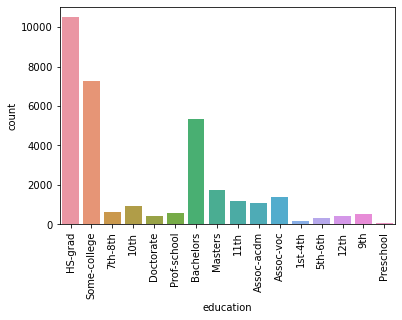

In [5]:
sns.countplot(df['education'],label="count")
plt.xticks(rotation=90)

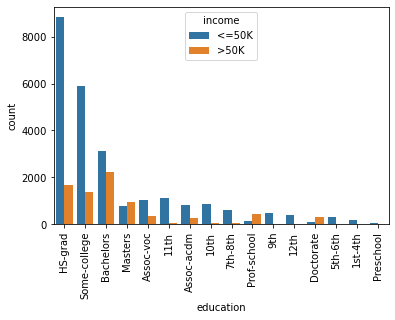

In [6]:
sns.countplot(x='education',hue='income',order=df['education'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

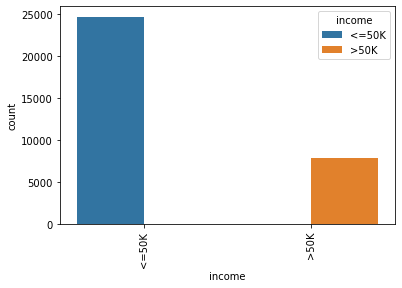

In [8]:
sns.countplot(x='income',hue='income',order=df['income'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
categorical_keep_columns=['age','workclass','education','marital_status','relationship']
df[categorical_keep_columns]

,age,workclass,education,marital_status,relationship
0,90,?,HS-grad,Widowed,Not-in-family
1,82,Private,HS-grad,Widowed,Not-in-family
2,66,?,Some-college,Widowed,Unmarried
3,54,Private,7th-8th,Divorced,Unmarried
4,41,Private,Some-college,Separated,Own-child
...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Not-in-family
32557,27,Private,Assoc-acdm,Married-civ-spouse,Wife
32558,40,Private,HS-grad,Married-civ-spouse,Husband
32559,58,Private,HS-grad,Widowed,Unmarried


In [12]:
keep_columns=['age','education_num']

In [13]:
df[keep_columns]

,age,education_num
0,90,9
1,82,9
2,66,10
3,54,4
4,41,10
...,...,...
32556,22,10
32557,27,12
32558,40,9
32559,58,9


In [14]:
X=df[keep_columns].values
Y=df['income'].values


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
gb_clf=GradientBoostingClassifier(n_estimators=20,learning_rate=1,max_features=2,max_depth=2,random_state=0)
gb_clf.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [17]:
print('Accuracy Score (training):',gb_clf.score(X_train,Y_train))
print('Accuracy Score (testing):',gb_clf.score(X_test,Y_test))

Accuracy Score (training): 0.792997542997543
Accuracy Score (testing): 0.7948717948717948


In [18]:
def get_number(age,workclass,education,relationship,marital_status):
    number_list=[]
    number_list.append(df[df.age==age]['age'].values[0])
    number_list.append(df[df.workclass==workclass]['workclass_num'].values[0])
    number_list.append(df[df.education==education]['education_num'].values[0])
    number_list.append(df[df.relationship==relationship]['relationship_num'].values[0])
    number_list.append(df[df.marital_status==marital_status]['marital_status_num'].values[0])
    return [number_list]

In [19]:
person=get_number(23,'?','HS-grad','Unmarried','Never-married')
person

KeyError: 'workclass_num'

In [20]:
gb_clf.predict(person)

NameError: name 'person' is not defined